In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [36]:
filepath = os.path.join("raw_data","ncaa_mens_march_madness_historical_results.csv")
raw_data = pd.read_csv(filepath)

In [37]:
raw_data.head()

,date,round,region,winning_seed,winner,winning_score,losing_seed,loser,losing_score,overtime
0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN
1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN
2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN
3,1985-03-14,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN
4,1985-03-14,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN


In [38]:
seed_1_loses = raw_data.loc[raw_data["losing_seed"] == 1, :]
year_count = 32
seed_count = year_count*4
champ_count = seed_count - len(seed_1_loses)

losing_rounds = seed_1_loses.groupby("round")

teams_lost = [0,
              losing_rounds["loser"].count()["Round of 32"],
              losing_rounds["loser"].count()["Sweet Sixteen"],
              losing_rounds["loser"].count()["Elite Eight"],
              losing_rounds["loser"].count()["National Semifinals"],
              losing_rounds["loser"].count()["National Championship"]
              ]

teams_remaining = []
pct_teams_remaining = []
cumulative_loses = 0

for losers in teams_lost:
    teams_left = seed_count - cumulative_loses
    teams_remaining.append(seed_count - cumulative_loses)
    pct_teams_left = teams_left/seed_count
    pct_teams_remaining.append(pct_teams_left)
    cumulative_loses = cumulative_loses + losers
teams_remaining.append(champ_count)
pct_teams_remaining.append(champ_count/seed_count)

print(pct_teams_remaining)
print(teams_remaining)

[1.0, 1.0, 0.8671875, 0.6953125, 0.40625, 0.234375, 0.1484375]
[128, 128, 111, 89, 52, 30, 19]


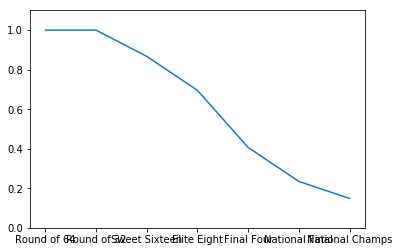

In [46]:
plt.plot(pct_teams_remaining)
xticks = ["Round of 64","Round of 32","Sweet Sixteen","Elite Eight","Final Four","National Final","National Champs"]
tick_locations = range(len(xticks))
plt.ylim(0,1.1)
plt.xticks(tick_locations, xticks)
plt.show()

In [ ]:


seed_1_loses = raw_data.loc[raw_data["losing_seed"] == 1, :]
year_count = 32
seed_count = year_count*4
champ_count = seed_count - len(seed_1_loses)

losing_rounds = seed_1_loses.groupby("round")